<a href="https://colab.research.google.com/github/brasilemnumeros/dados/blob/main/pib/PIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analise e visualize a taxa de variação real anual do PIB (código 7326) utilizando o pacote `python-bcb`.

## Coleta de dados

### Subtask:
Buscar uma fonte confiável de dados históricos do PIB.


In [ ]:
%pip install python-bcb

## Coleta de dados do pib

### Subtask:
Coletar os dados históricos da taxa de variação real anual do PIB (código 7326) utilizando o pacote `python-bcb`, em múltiplos períodos, se necessário.


**Reasoning**:
The task requires collecting historical data for the annual real GDP growth rate using the `python-bcb` package. This involves defining the series code, start and end dates, looping through periods to fetch data in chunks, handling potential errors, concatenating the collected dataframes, and displaying basic information about the combined dataframe. These steps can be combined into a single code block.



In [ ]:
from bcb import sgs
import pandas as pd
from datetime import datetime, timedelta

# Define the series code for the annual real GDP growth rate
pib_code = 7326

# Define the end date as today
end_date = datetime.now()

# Define the start date for the historical period (e.g., from 1995-01-01)
start_date_overall = datetime(1995, 1, 1)

# List to store dataframes for each collection period
dfs_pib = []

# Define the period length in years for chunking data collection
period_years_pib = 10

# Loop through periods backwards from the end date
current_end_date_pib = end_date
while current_end_date_pib > start_date_overall:
    # Determine the start date for the current period, ensuring it's not before start_date_overall
    current_start_date_pib = max(start_date_overall, current_end_date_pib - timedelta(days=period_years_pib * 365))

    print(f"Attempting to retrieve PIB data from {current_start_date_pib.strftime('%Y-%m-%d')} to {current_end_date_pib.strftime('%Y-%m-%d')}")

    try:
        # Use the bcb.sgs.get() function to retrieve the series data for the current period
        # Pass the series code as a list of tuples to specify the column name
        df_period_pib = sgs.get([('pib', pib_code)], start=current_start_date_pib.strftime('%Y-%m-%d'), end=current_end_date_pib.strftime('%Y-%m-%d'))

        if not df_period_pib.empty:
            print(f"PIB data retrieved for the period: {current_start_date_pib.strftime('%Y-%m-%d')} to {current_end_date_pib.strftime('%Y-%m-%d')}")
            dfs_pib.append(df_period_pib)
        else:
            print(f"No PIB data retrieved for the period: {current_start_date_pib.strftime('%Y-%m-%d')} to {current_end_date_pib.strftime('%Y-%m-%d')}")

    except Exception as e:
        print(f"An error occurred while retrieving PIB data for the period {current_start_date_pib.strftime('%Y-%m-%d')} to {current_end_date_pib.strftime('%Y-%m-%d')}: {e}")

    # Set the end date for the next period as the day before the current period's start date
    current_end_date_pib = current_start_date_pib - timedelta(days=1)

print(f"Collected {len(dfs_pib)} dataframes for different PIB periods.")

# Combine all dataframes in the list if the list is not empty
if dfs_pib:
    # Concatenate the dataframes and sort the index (dates) to ensure chronological order
    df_pib = pd.concat(dfs_pib).sort_index()
    print("\nPIB DataFrames combined successfully!")

    print("\nPrimeiras 5 linhas do DataFrame df_pib:")
    display(df_pib.head())

    print("\nÚltimas 5 linhas do DataFrame df_pib:")
    display(df_pib.tail())

    print("\nInformações do DataFrame df_pib:")
    df_pib.info()

else:
    print("The list of PIB DataFrames is empty. No data to combine.")
    df_pib = None

Attempting to retrieve PIB data from 2015-09-03 to 2025-08-31
PIB data retrieved for the period: 2015-09-03 to 2025-08-31
Attempting to retrieve PIB data from 2005-09-04 to 2015-09-02
PIB data retrieved for the period: 2005-09-04 to 2015-09-02
Attempting to retrieve PIB data from 1995-09-06 to 2005-09-03
PIB data retrieved for the period: 1995-09-06 to 2005-09-03
Attempting to retrieve PIB data from 1995-01-01 to 1995-09-05
PIB data retrieved for the period: 1995-01-01 to 1995-09-05
Collected 4 dataframes for different PIB periods.

PIB DataFrames combined successfully!

Primeiras 5 linhas do DataFrame df_pib:


,pib
Date,
1995-01-01,4.22
1995-01-01,4.22
1996-01-01,2.21
1997-01-01,3.39
1998-01-01,0.34



Últimas 5 linhas do DataFrame df_pib:


,pib
Date,
2020-01-01,-3.28
2021-01-01,4.76
2022-01-01,3.02
2023-01-01,3.24
2024-01-01,3.40



Informações do DataFrame df_pib:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 1995-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pib     33 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


## Análise exploratória do pib

### Subtask:
Realizar uma análise inicial dos dados do PIB para entender sua estrutura e características.


**Reasoning**:
Display the head and tail of the DataFrame, check its information, describe its statistics, and check the date range to understand its structure and content as requested by the subtask.



In [ ]:
# Display the first 5 rows of the DataFrame
print("Primeiras 5 linhas do DataFrame df_pib:")
display(df_pib.head())

# Display the last 5 rows of the DataFrame
print("\nÚltimas 5 linhas do DataFrame df_pib:")
display(df_pib.tail())

# Get information about the DataFrame (data types, non-null counts)
print("\nInformações do DataFrame df_pib:")
df_pib.info()

# Generate descriptive statistics for the 'pib' column
print("\nEstatísticas Descritivas da Taxa de Variação Real Anual do PIB:")
print(df_pib['pib'].describe())

# Check the date range of the data
min_date = df_pib.index.min()
max_date = df_pib.index.max()
print(f"\nPeríodo dos dados do PIB: {min_date.strftime('%Y-%m-%d')} a {max_date.strftime('%Y-%m-%d')}")

Primeiras 5 linhas do DataFrame df_pib:


,pib
Date,
1995-01-01,4.22
1995-01-01,4.22
1996-01-01,2.21
1997-01-01,3.39
1998-01-01,0.34



Últimas 5 linhas do DataFrame df_pib:


,pib
Date,
2020-01-01,-3.28
2021-01-01,4.76
2022-01-01,3.02
2023-01-01,3.24
2024-01-01,3.40



Informações do DataFrame df_pib:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 1995-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pib     33 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes

Estatísticas Descritivas da Taxa de Variação Real Anual do PIB:
count    33.000000
mean      2.241515
std       2.754512
min      -3.550000
25%       1.140000
50%       3.020000
75%       3.970000
max       7.530000
Name: pib, dtype: float64

Período dos dados do PIB: 1995-01-01 a 2024-01-01


## Visualização do pib

### Subtask:
Criar um gráfico para visualizar a evolução histórica da taxa de variação real anual do PIB ao longo do tempo.


**Reasoning**:
Create a plot to visualize the historical evolution of the annual real GDP growth rate using matplotlib and seaborn.



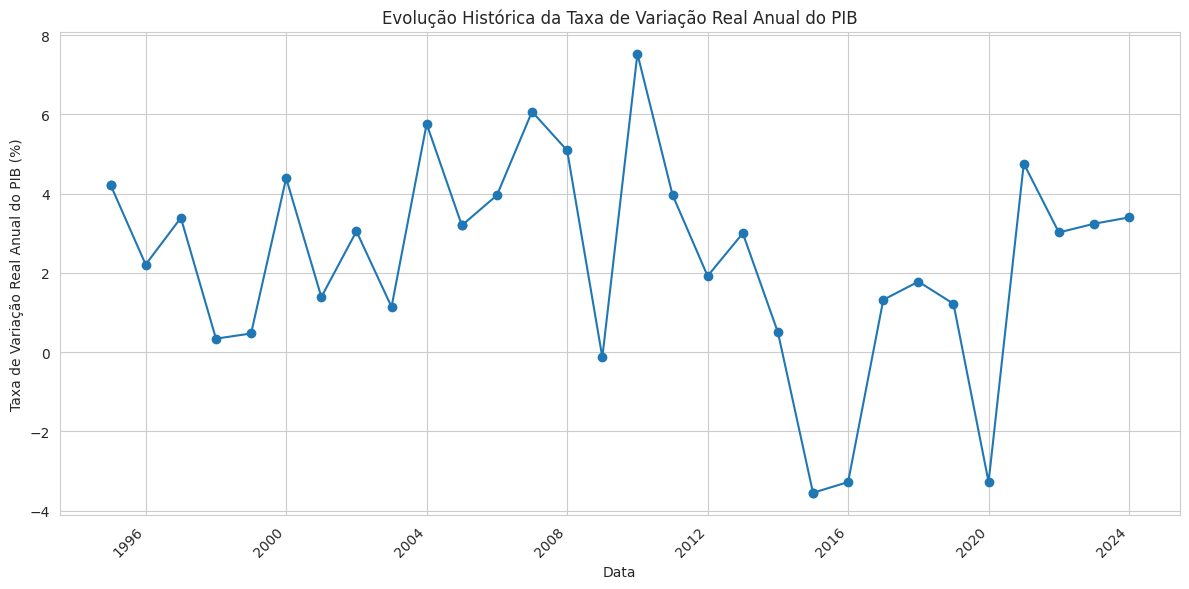

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure and an axes for the plot
plt.figure(figsize=(12, 6))
ax = plt.gca() # Get current axes

# Plot the time series of the annual real GDP growth rate
df_pib['pib'].plot(ax=ax, marker='o', linestyle='-')

# Add titles and labels
plt.title('Evolução Histórica da Taxa de Variação Real Anual do PIB')
plt.xlabel('Data')
plt.ylabel('Taxa de Variação Real Anual do PIB (%)')

# Improve date formatting on the x-axis
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()

## Salvar dados do pib em json

### Subtask:
Gerar um arquivo JSON com os dados consolidados da taxa de variação real anual do PIB.


**Reasoning**:
Generate a JSON file with the consolidated annual real GDP growth rate data.



In [ ]:
import json

# Create an empty list to store the data points for the JSON output
data_list_pib = []

# Iterate through the df_pib DataFrame
for index, row in df_pib.iterrows():
    # Append a dictionary to data_list_pib with 'date' and 'rate'
    data_list_pib.append({
        "date": index.strftime('%Y-%m-%d'),  # Format date as YYYY-MM-DD
        "rate": row['pib']  # Use the 'pib' value
    })

# Create the main dictionary structure for the JSON output
json_output_pib = {
    "indicatorName": "Taxa Variação Real Anual PIB (%)",  # Set the indicator name
    "data": data_list_pib  # Include the list of data points
}

# Define the output file path
output_file_path = 'pib_anual.json'

# Save the dictionary to a JSON file with indentation for readability
with open(output_file_path, 'w') as f:
    json.dump(json_output_pib, f, indent=4)

print(f"Dados da Taxa de Variação Real Anual do PIB formatados e salvos em '{output_file_path}'")

Dados da Taxa de Variação Real Anual do PIB formatados e salvos em 'pib_anual.json'
